# House Sale Price Prediction

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [19]:
data=pd.read_csv('Raw_Housing_Prices.csv')
data.head(2)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

## EDA

In [23]:
# Statistics
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [25]:
data.corr(numeric_only=True)

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
ID,1.000000,-0.016834,0.001286,0.005186,-0.012384,-0.132110,0.018525,0.013799,-0.010738,-0.005151,-0.021380,-0.016907,-0.008269,-0.001952,0.020805,-0.002888,-0.138798
Sale Price,-0.016834,1.000000,0.308463,0.525124,0.702081,0.089616,0.256941,0.580654,0.605495,0.323813,-0.054034,0.126436,-0.053198,0.306889,0.021507,0.585393,0.082445
No of Bedrooms,0.001286,0.308463,1.000000,0.515883,0.576616,0.031620,0.175429,0.349008,0.477592,0.303093,-0.154178,0.018841,-0.152656,-0.008879,0.129499,0.391649,0.029244
No of Bathrooms,0.005186,0.525124,0.515883,1.000000,0.754691,0.087758,0.500601,0.635573,0.685249,0.283774,-0.505957,0.050752,-0.204044,0.024508,0.223165,0.568606,0.087218
Flat Area (in Sqft),-0.012384,0.702081,0.576616,0.754691,1.000000,0.172809,0.353950,0.705835,0.876587,0.435230,-0.318207,0.055365,-0.199416,0.052543,0.240152,0.756357,0.183223
Lot Area (in Sqft),-0.132110,0.089616,0.031620,0.087758,0.172809,1.000000,-0.005235,0.102345,0.183512,0.015287,-0.053062,0.007717,-0.129536,-0.085672,0.229494,0.144548,0.718548
No of Floors,0.018525,0.256941,0.175429,0.500601,0.353950,-0.005235,1.000000,0.461228,0.523840,-0.245705,-0.489319,0.006338,-0.059122,0.049648,0.125391,0.279874,-0.011269
Overall Grade,0.013799,0.580654,0.349008,0.635573,0.705835,0.102345,0.461228,1.000000,0.705183,0.145266,-0.456629,0.010440,-0.185836,0.111301,0.201745,0.681338,0.107581
Area of the House from Basement (in Sqft),-0.010738,0.605495,0.477592,0.685249,0.876587,0.183512,0.523840,0.705183,1.000000,-0.051821,-0.423822,0.023301,-0.261130,-0.000866,0.343776,0.731998,0.194100
Basement Area (in Sqft),-0.005151,0.323813,0.303093,0.283774,0.435230,0.015287,-0.245705,0.145266,-0.051821,1.000000,0.133124,0.071323,0.074854,0.110554,-0.144728,0.200371,0.017276


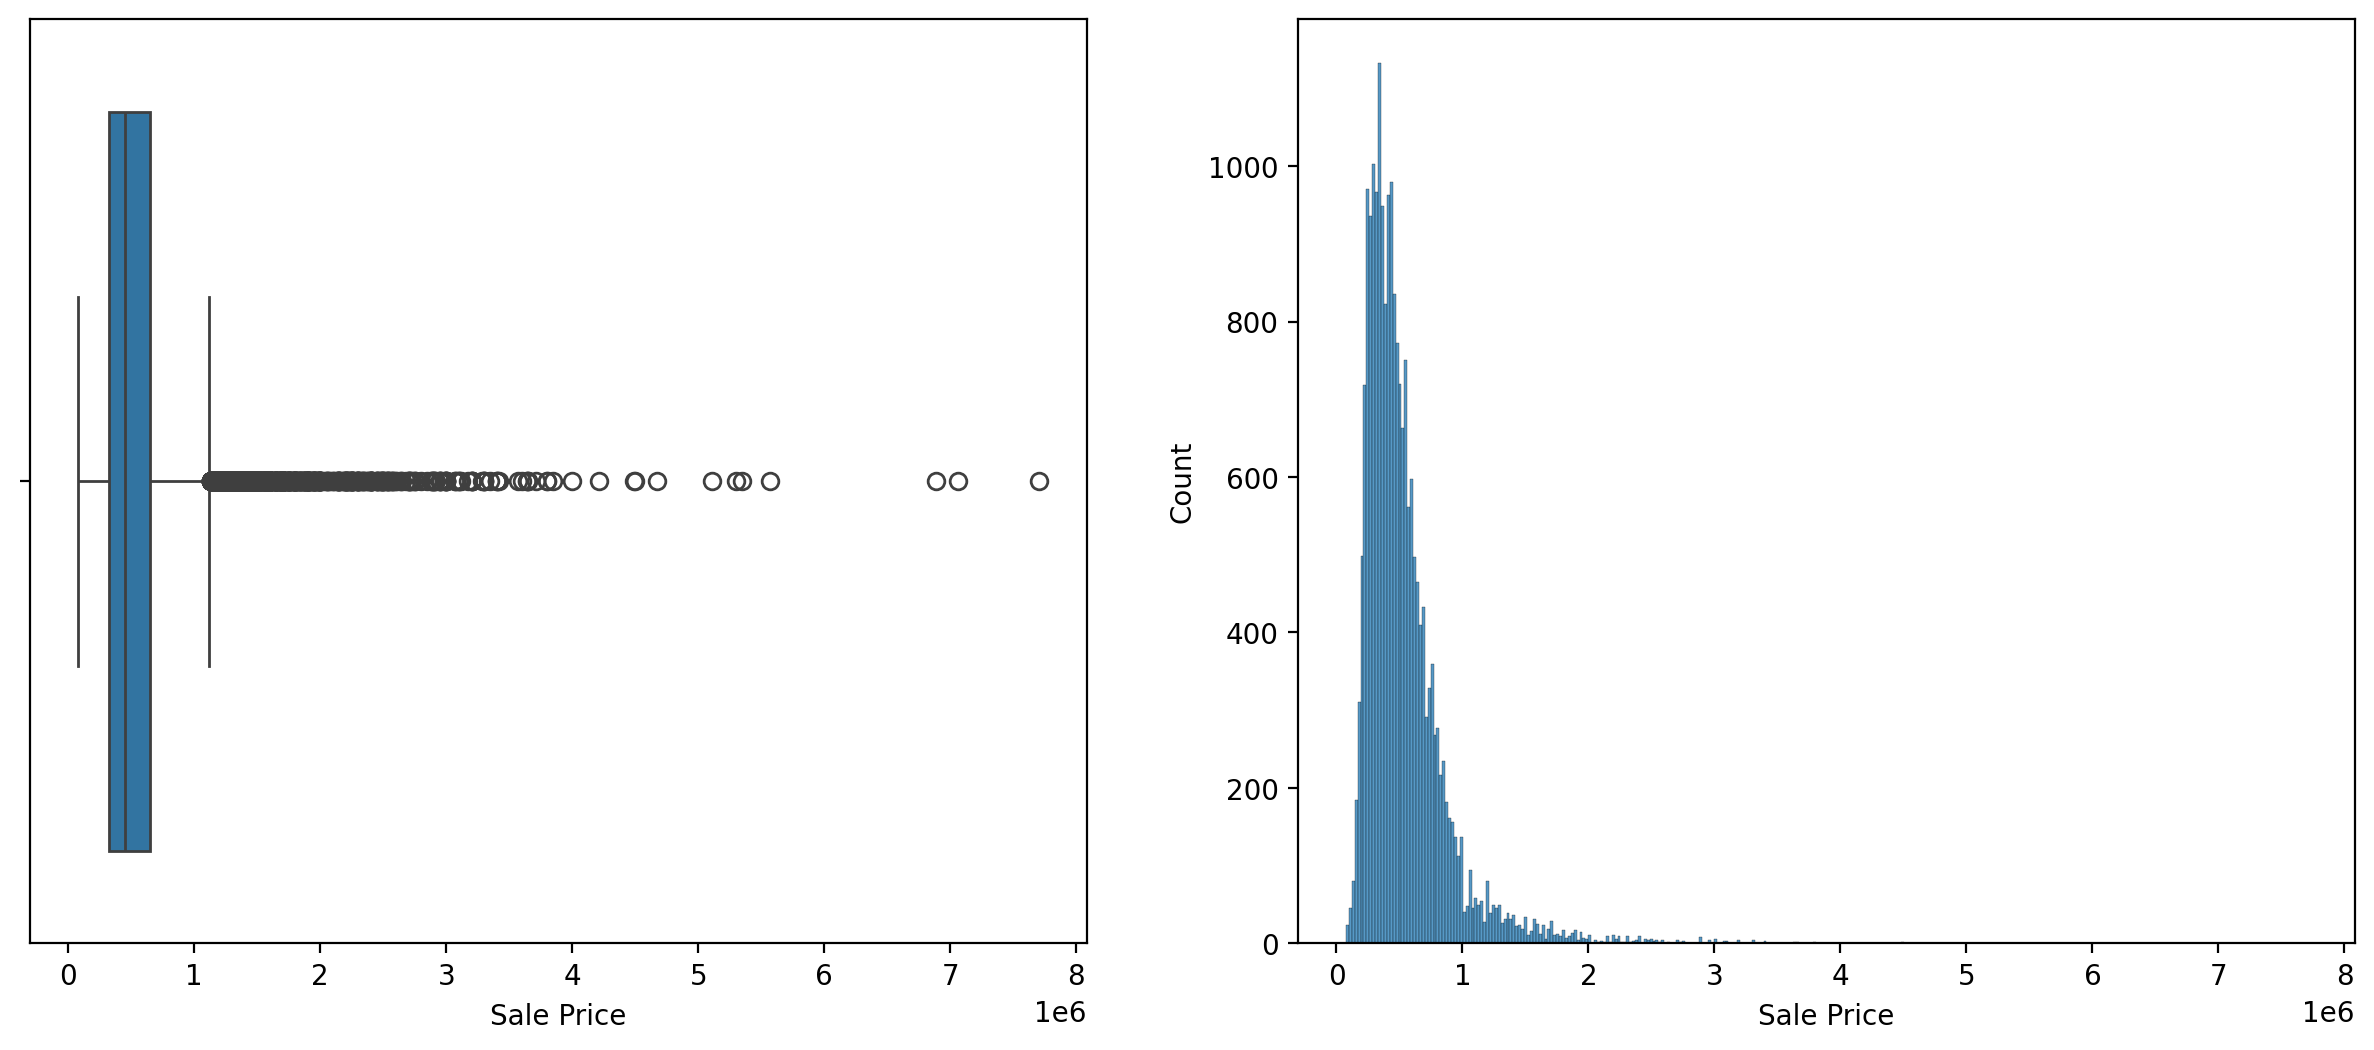

In [27]:
plt.figure(figsize = (15,6), dpi = 200)
plt.subplot(1,2,1)
sns.boxplot(x=data['Sale Price']) # to check the outliers
plt.subplot(1,2,2)
sns.histplot(data['Sale Price']) # to check the data distribution 
plt.show()

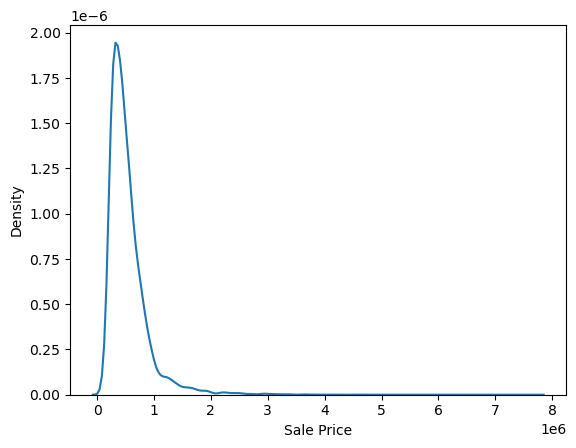

In [29]:
sns.kdeplot(data['Sale Price'])
plt.ion()

## Treating Outliers from Target variable(Sale Price)

In [31]:
# as the data distribution in sales price is not normal, we will use IQR method to treat outliers
# Finding the IQR
q1 = data['Sale Price'].quantile(.25)
q3 = data['Sale Price'].quantile(.75)

IQR = q3 - q1

# Finding the limits
upper_limit = q3 + (IQR*1.5)
lower_limit = q1 - (IQR*1.5)

if lower_limit < data['Sale Price'].min():
    lower_limit = data['Sale Price'].min()

print('IQR: '+str(IQR))
print('lower_limit: '+str(lower_limit))
print('upper_limit: '+str(upper_limit))

IQR: 323050.0
lower_limit: 75000.0
upper_limit: 1129575.0


In [33]:
# Outlier Imputation
def imputer(value):
    if value < lower_limit:
        return lower_limit
    if value > upper_limit:
        return upper_limit
    else:
        return value

data['Sale Price'] = data['Sale Price'].apply(imputer)

In [35]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

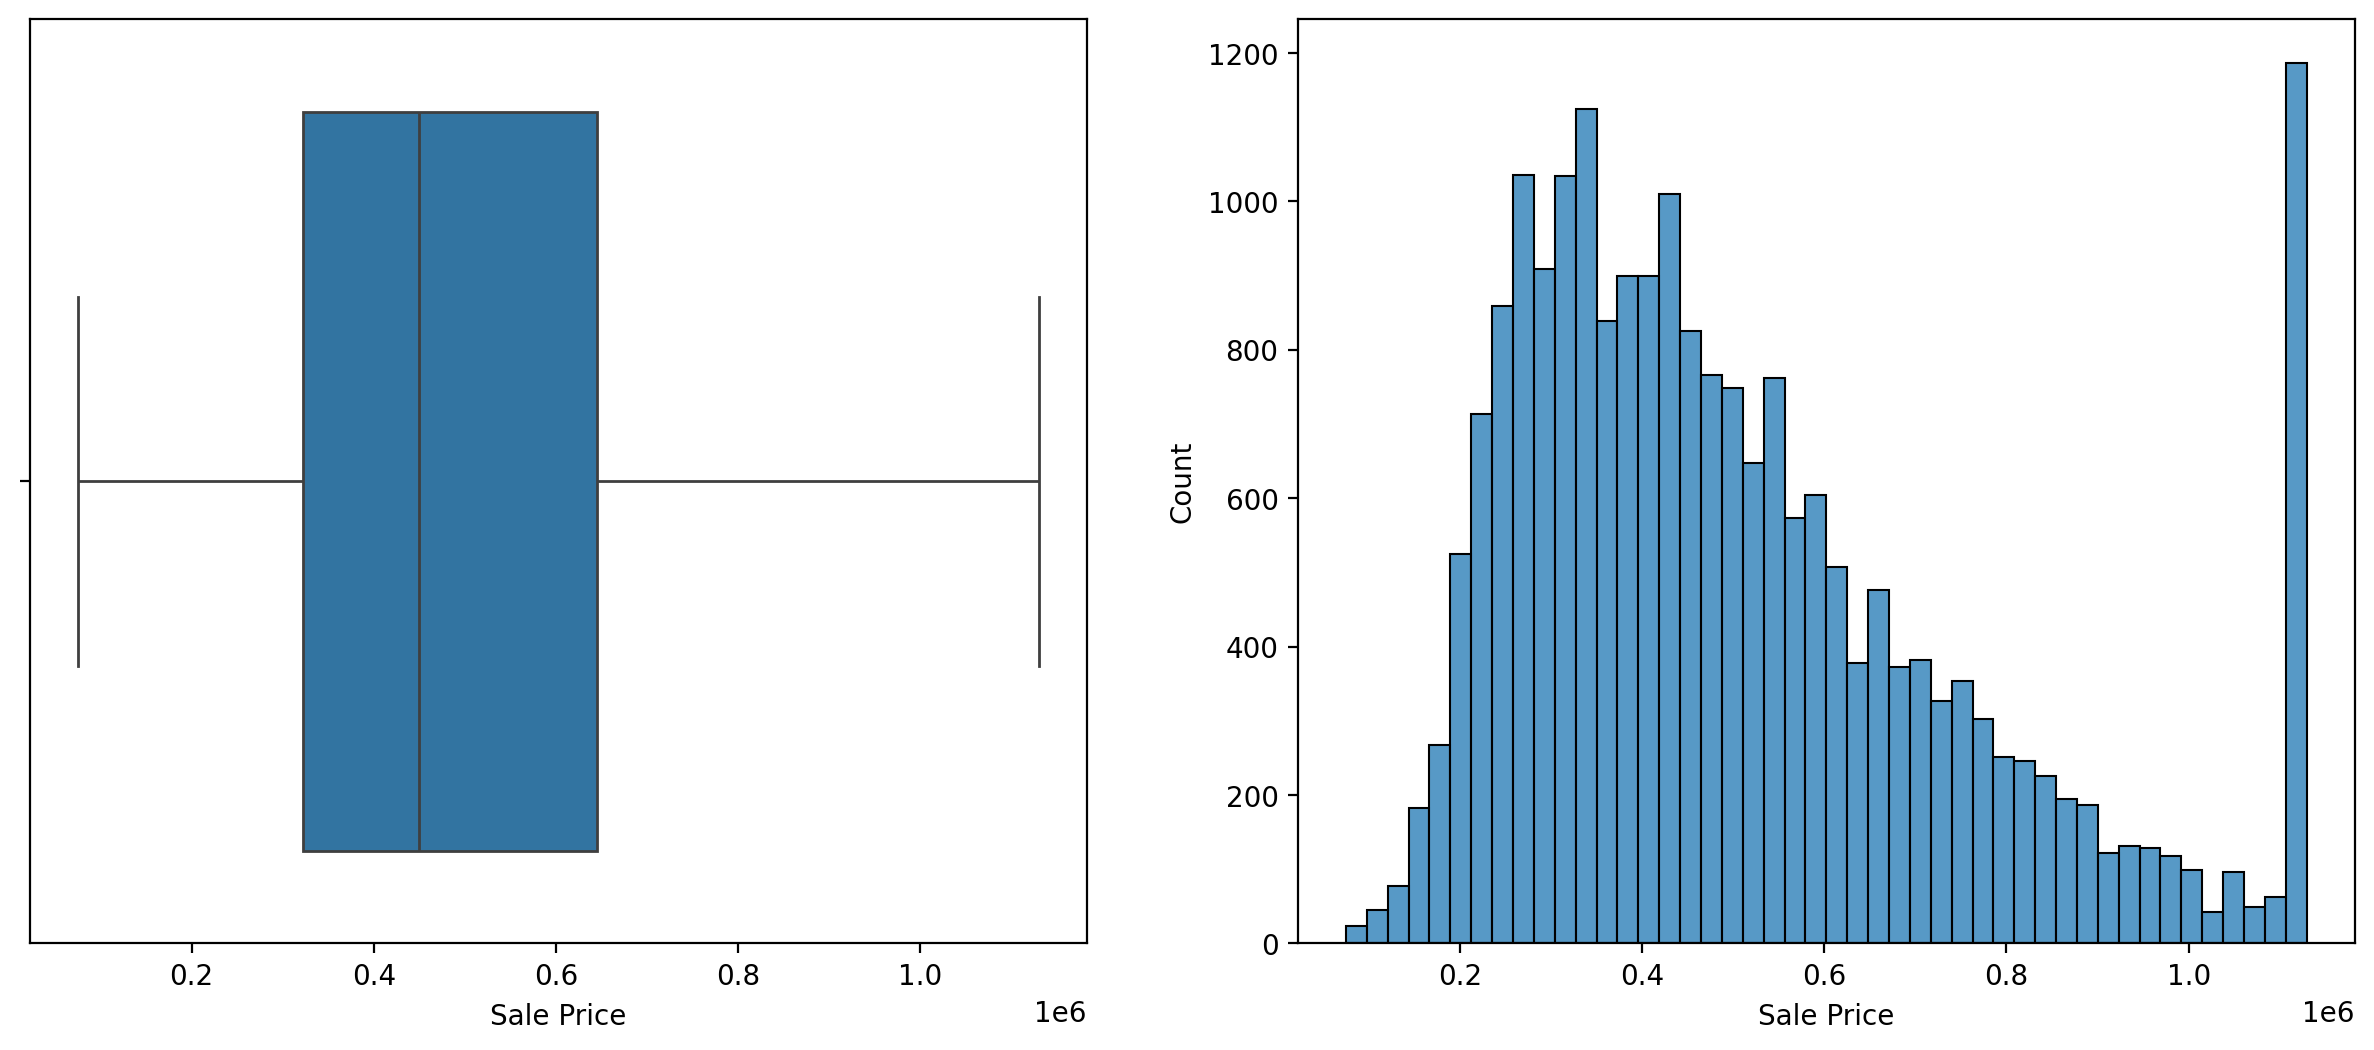

In [37]:
plt.figure(figsize = (15,6), dpi = 200)
plt.subplot(1,2,1)
sns.boxplot(x=data['Sale Price']) # to check the outliers after imputation
plt.subplot(1,2,2)
sns.histplot(data['Sale Price']) # to check the data distribution imputation
plt.show()

In [39]:
np.sum(data['Sale Price'].isnull()) # to check the missing valus in the target variable

4

In [41]:
''' removing the null values from the target variable '''
data.dropna(subset=['Sale Price'],inplace=True)
data['Sale Price'].isnull().sum()

0

<Axes: xlabel='Sale Price', ylabel='Count'>

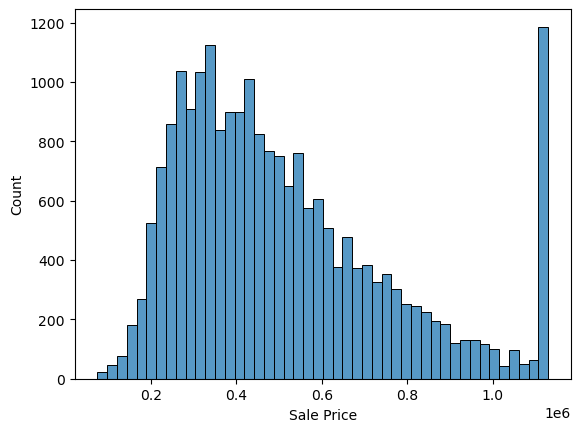

In [43]:
sns.histplot(data['Sale Price'])

## Treating independent features

In [45]:
data['No of Times Visited'] = data['No of Times Visited'].fillna('None')

In [47]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

<Axes: xlabel='Sale Price', ylabel='Count'>

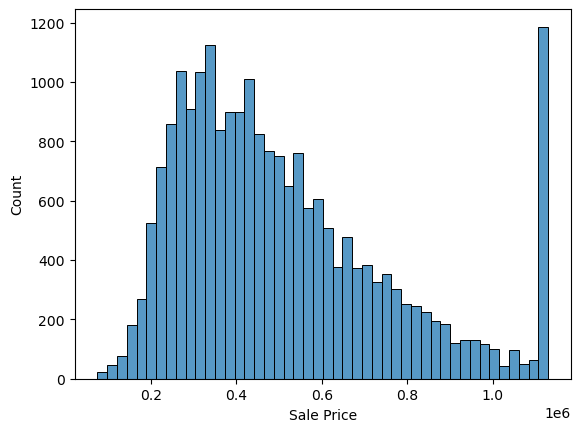

In [49]:
sns.histplot(data['Sale Price']) # to check if above change affects the target 

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House     

In [53]:
'''choosing the numerical features which have null values except zipcode which
we will treat later'''

Numerical_columns = ['No of Bathrooms','Lot Area (in Sqft)', 'Flat Area (in Sqft)','Area of the House from Basement (in Sqft)',
                     'Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[Numerical_columns] = imputer.fit_transform(data[Numerical_columns])

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House     

In [59]:
# zipcode transformation
zip_column = data['Zipcode'].values.reshape(-1,1)

In [61]:
Imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = Imputer.fit_transform(zip_column)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House     

##  Categorical to Numerical feature conversion

In [65]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [67]:
data['No of Times Visited'] = data['No of Times Visited'].map({'None':'0',
                                                               'Once':'1',
                                                               'Twice':'2',
                                                               'Thrice':'3',
                                                               'Four':'4'})

In [69]:
# checking if mapping done
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

## Creating new features

In [79]:
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [85]:
data['Purchase Year'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: Purchase Year, dtype: int32

In [89]:
data['Ever_Renovated'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')
data['Ever_Renovated'].head()

0     No
1    Yes
2     No
3     No
4     No
Name: Ever_Renovated, dtype: object

In [91]:
data['Since Renovation'] = np.where(data['Ever_Renovated']== 'Yes', abs(data['Purchase Year'] - data['Renovated Year']),0)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House     

In [101]:
# drop the redundant variables
data.drop(columns = ['ID', 'Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  object 
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from Base

In [105]:
## zipcode binning
data['Condition of the House'].head(10) 

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [107]:
data['Condition of the House'].value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

<Axes: xlabel='Condition of the House'>

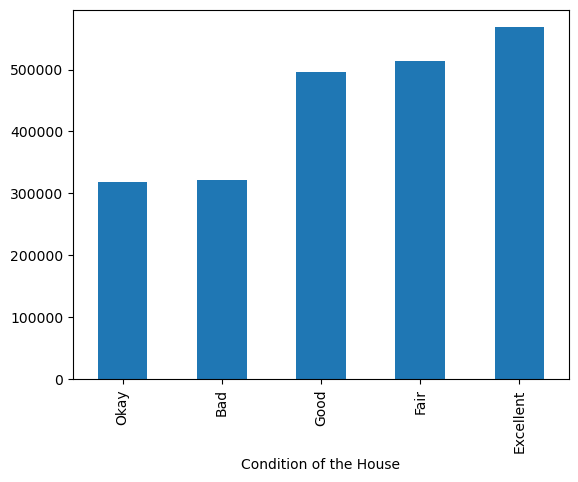

In [111]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Waterfront View'>

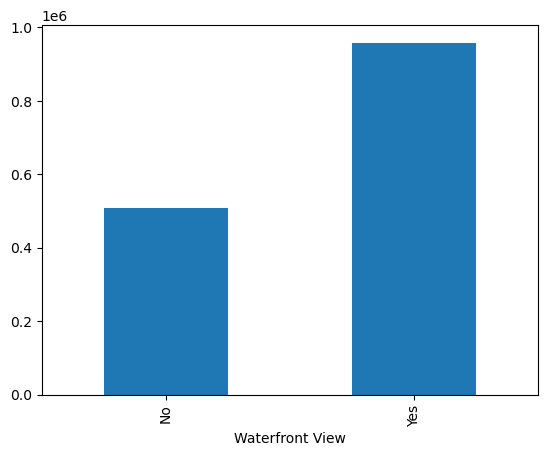

In [113]:
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Ever_Renovated'>

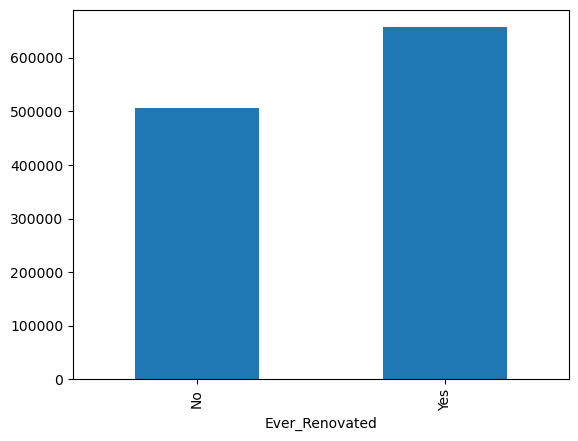

In [117]:
data.groupby('Ever_Renovated')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Zipcode'>

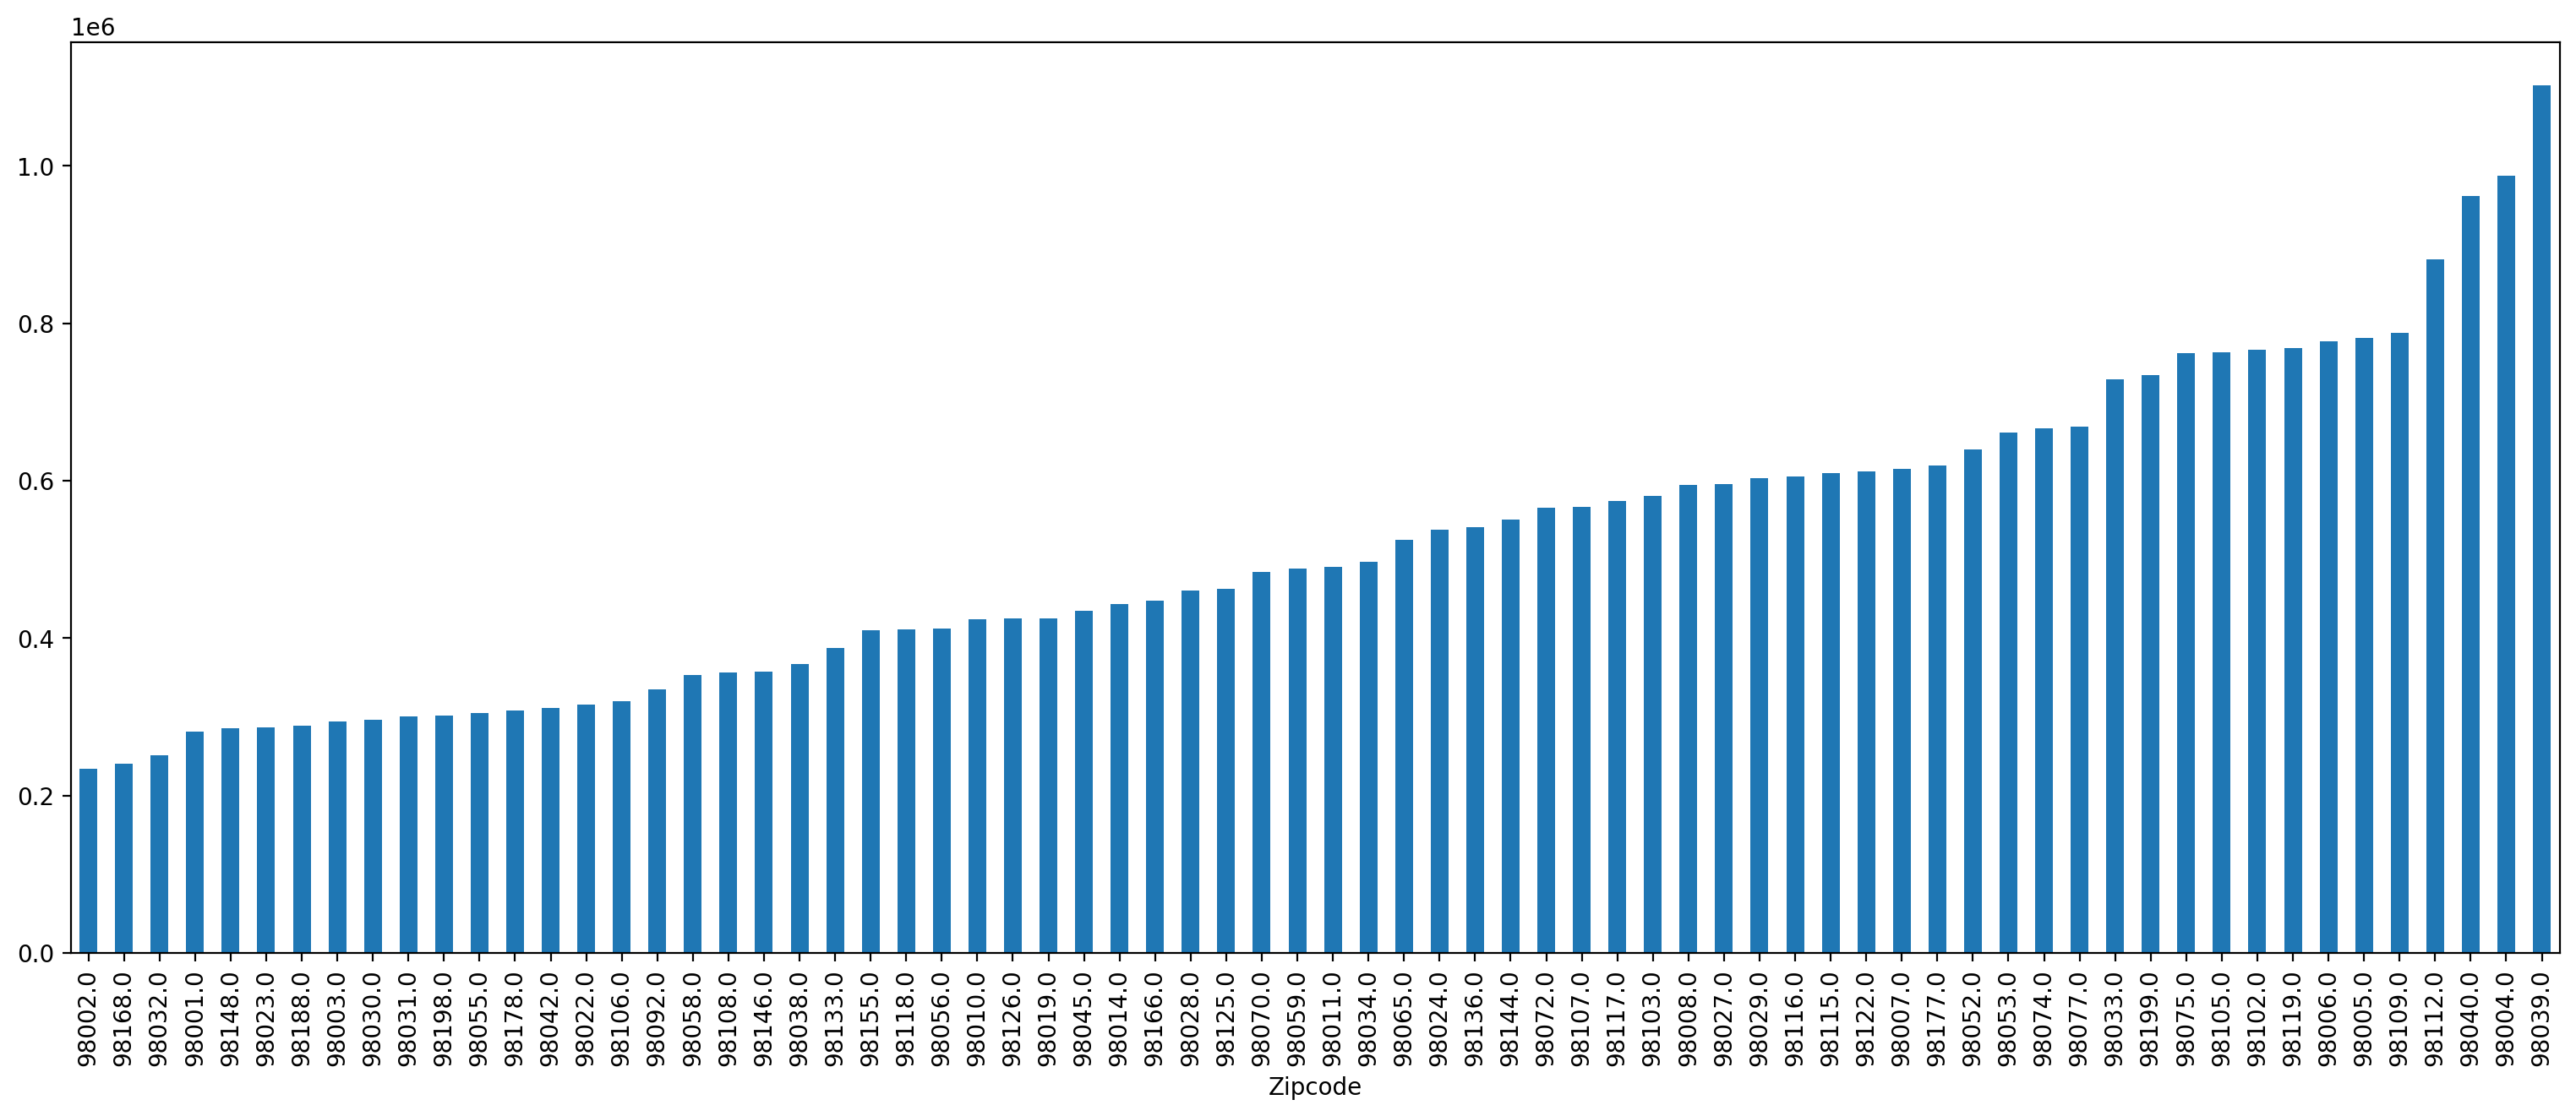

In [121]:
plt.figure(figsize = (19,7),dpi = 200)
data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

# Linear Regression

In [128]:
data.dropna(inplace=True)
X = data.drop(columns=['Sale Price'])
Y = data['Sale Price']

In [126]:
def distribution (data, var):
    plt.figure(figsize = (len(var)*6,6),dpi = 200)
    for j,i in enumerate(var):
      plt.subplot(1,len(var),j+1)
      plt.hist(data[i])
      plt.title(i)

In [134]:
n1 =['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors']
n2 = ['Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude']
n3 = ['Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Since Renovation']

In [136]:
for i in n1:
    X[i] = pd.to_numeric(X[i])

for j in n2:
    X[j] = pd.to_numeric(X[j])

for k in n3:
    X[k] = pd.to_numeric(X[k])

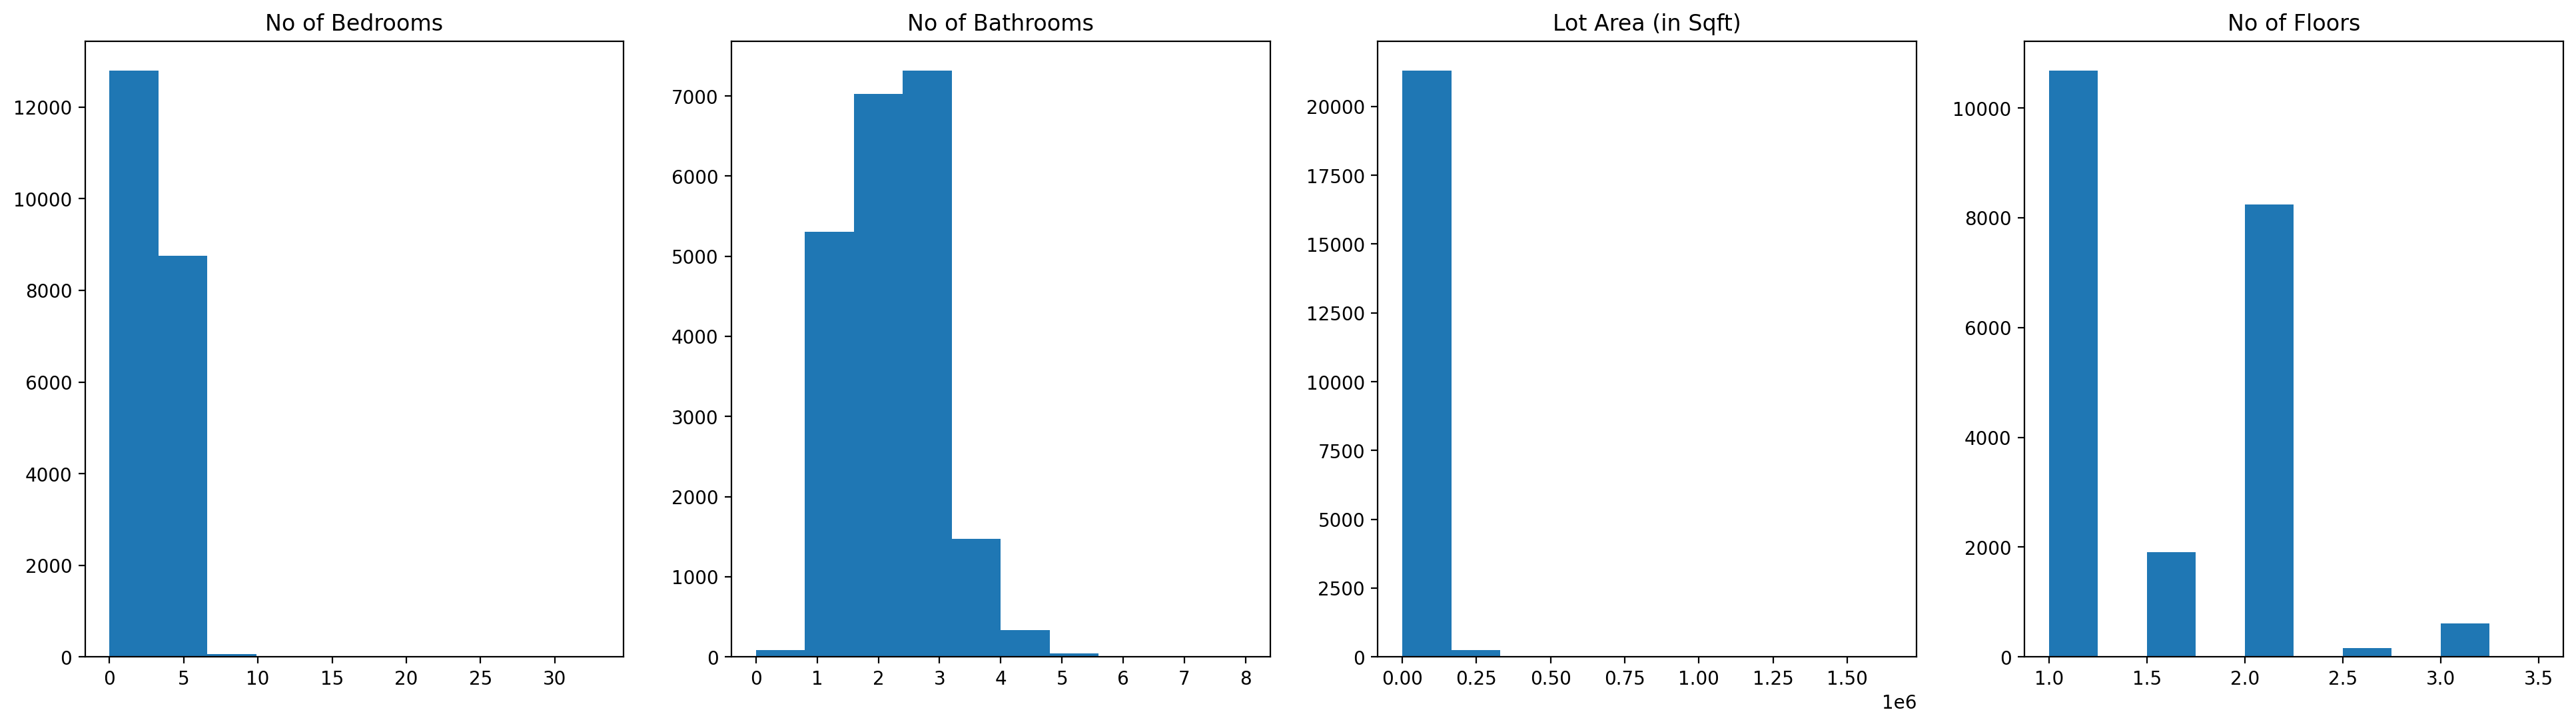

In [138]:
distribution(X, n1)

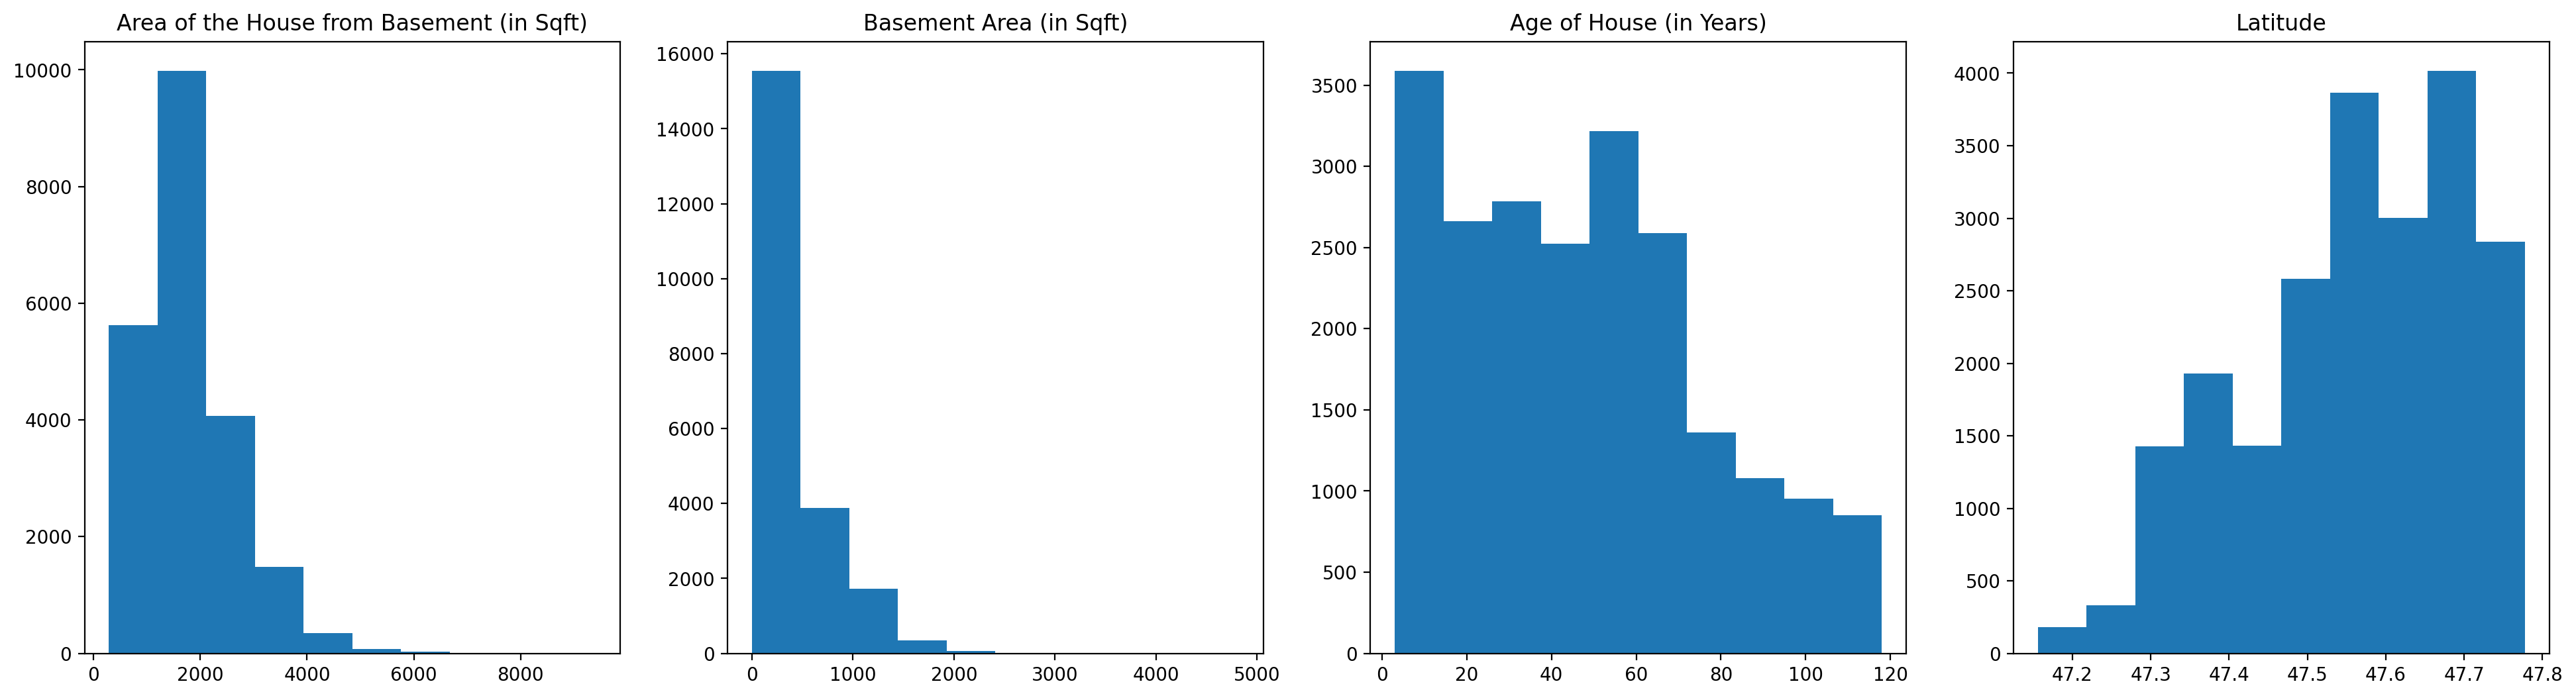

In [142]:
distribution(X,n2)

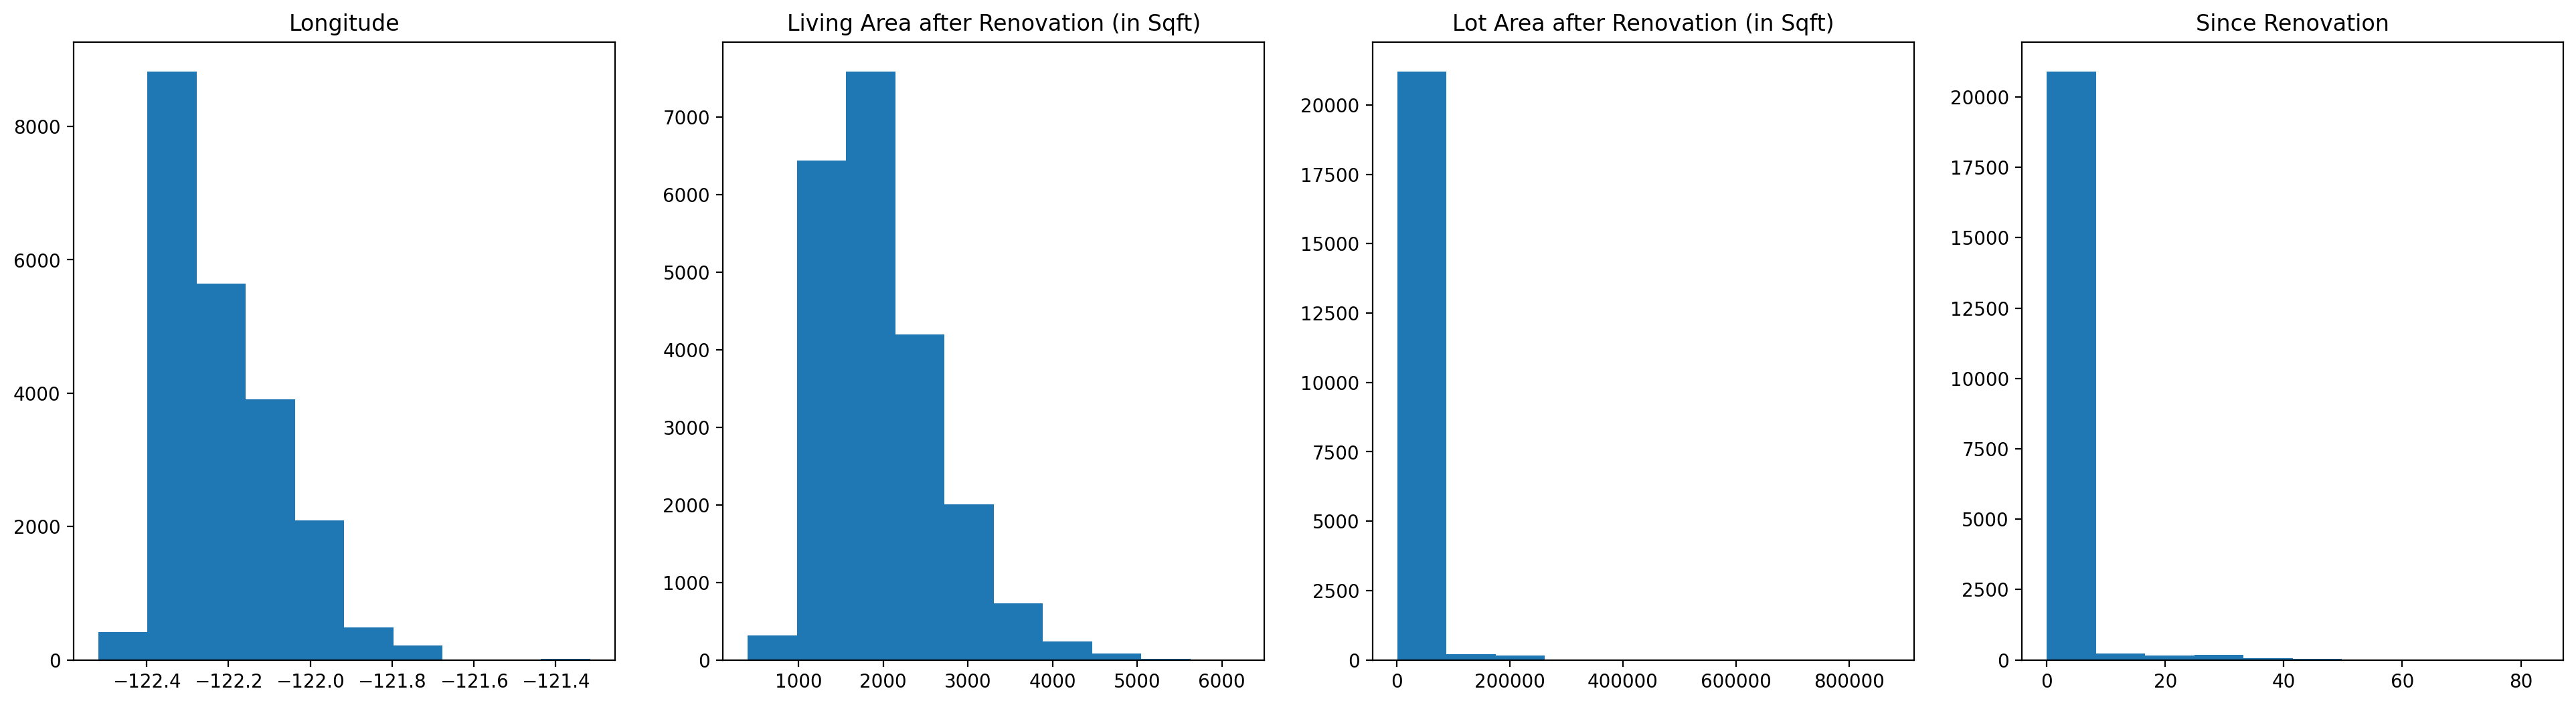

In [144]:
distribution(X,n3)

In [150]:
#removing right skew
def right_skew(x):
  return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Since Renovation']

In [152]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

# removing infinite values
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

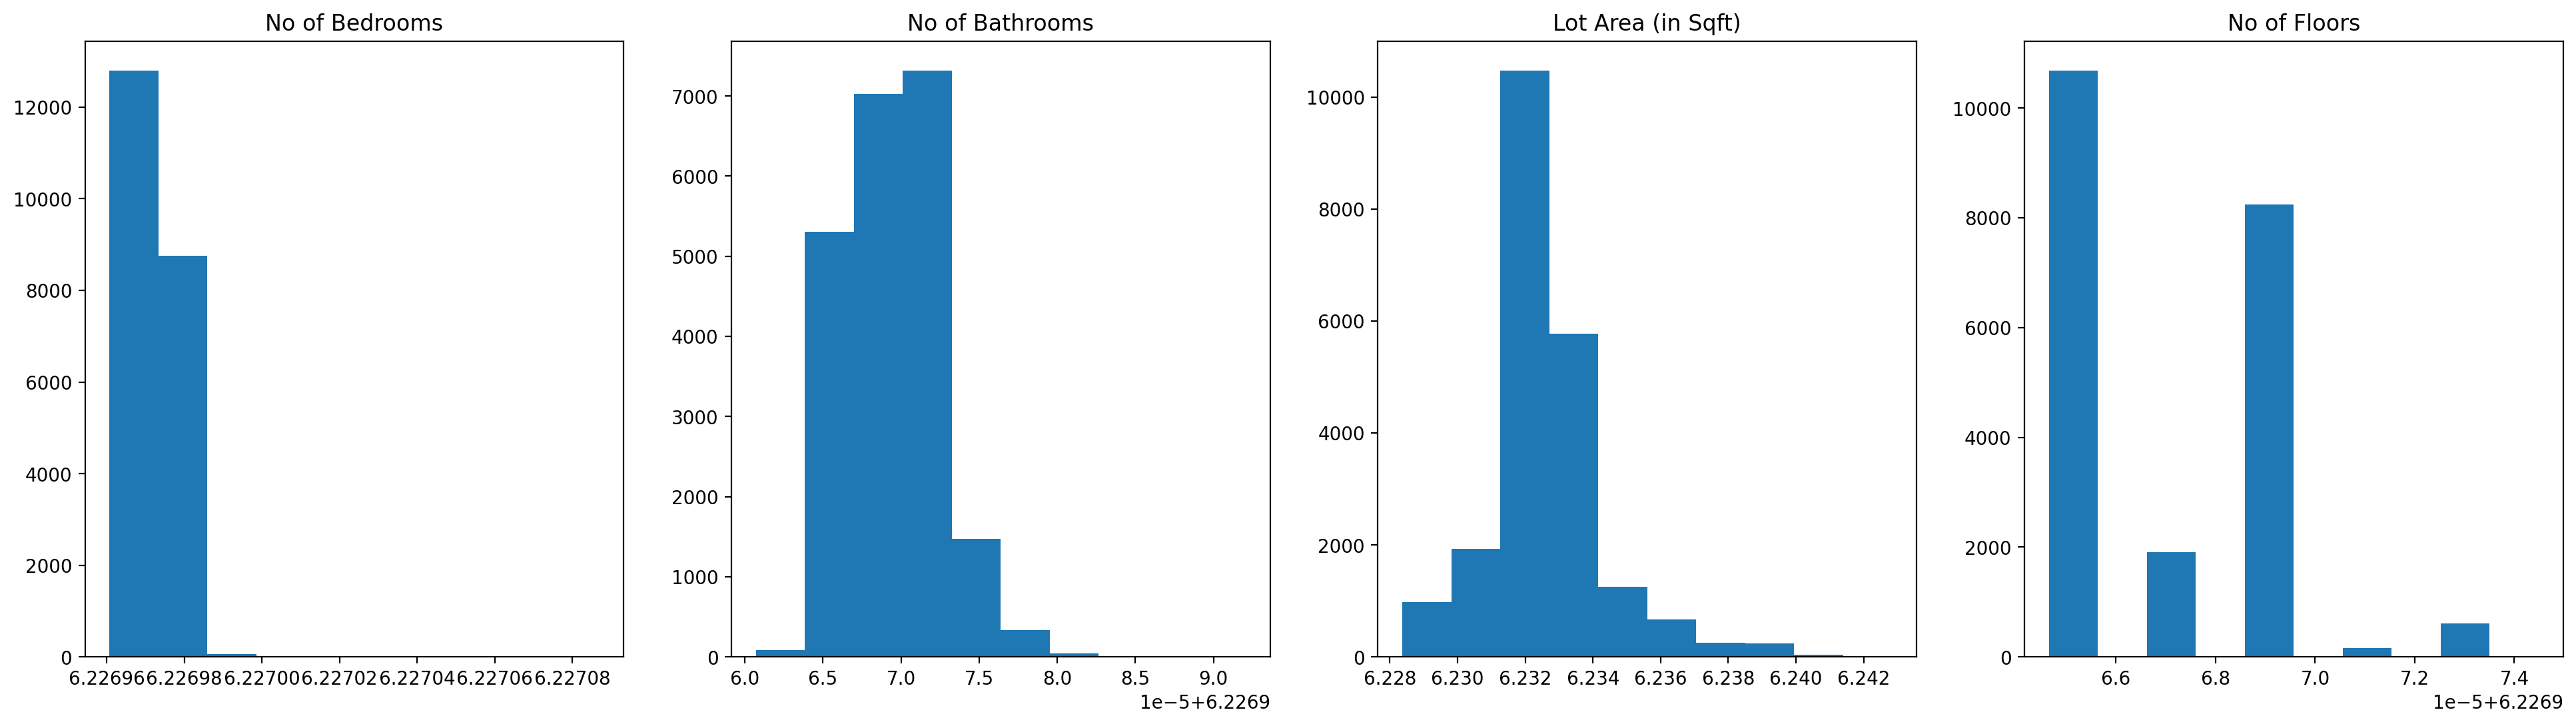

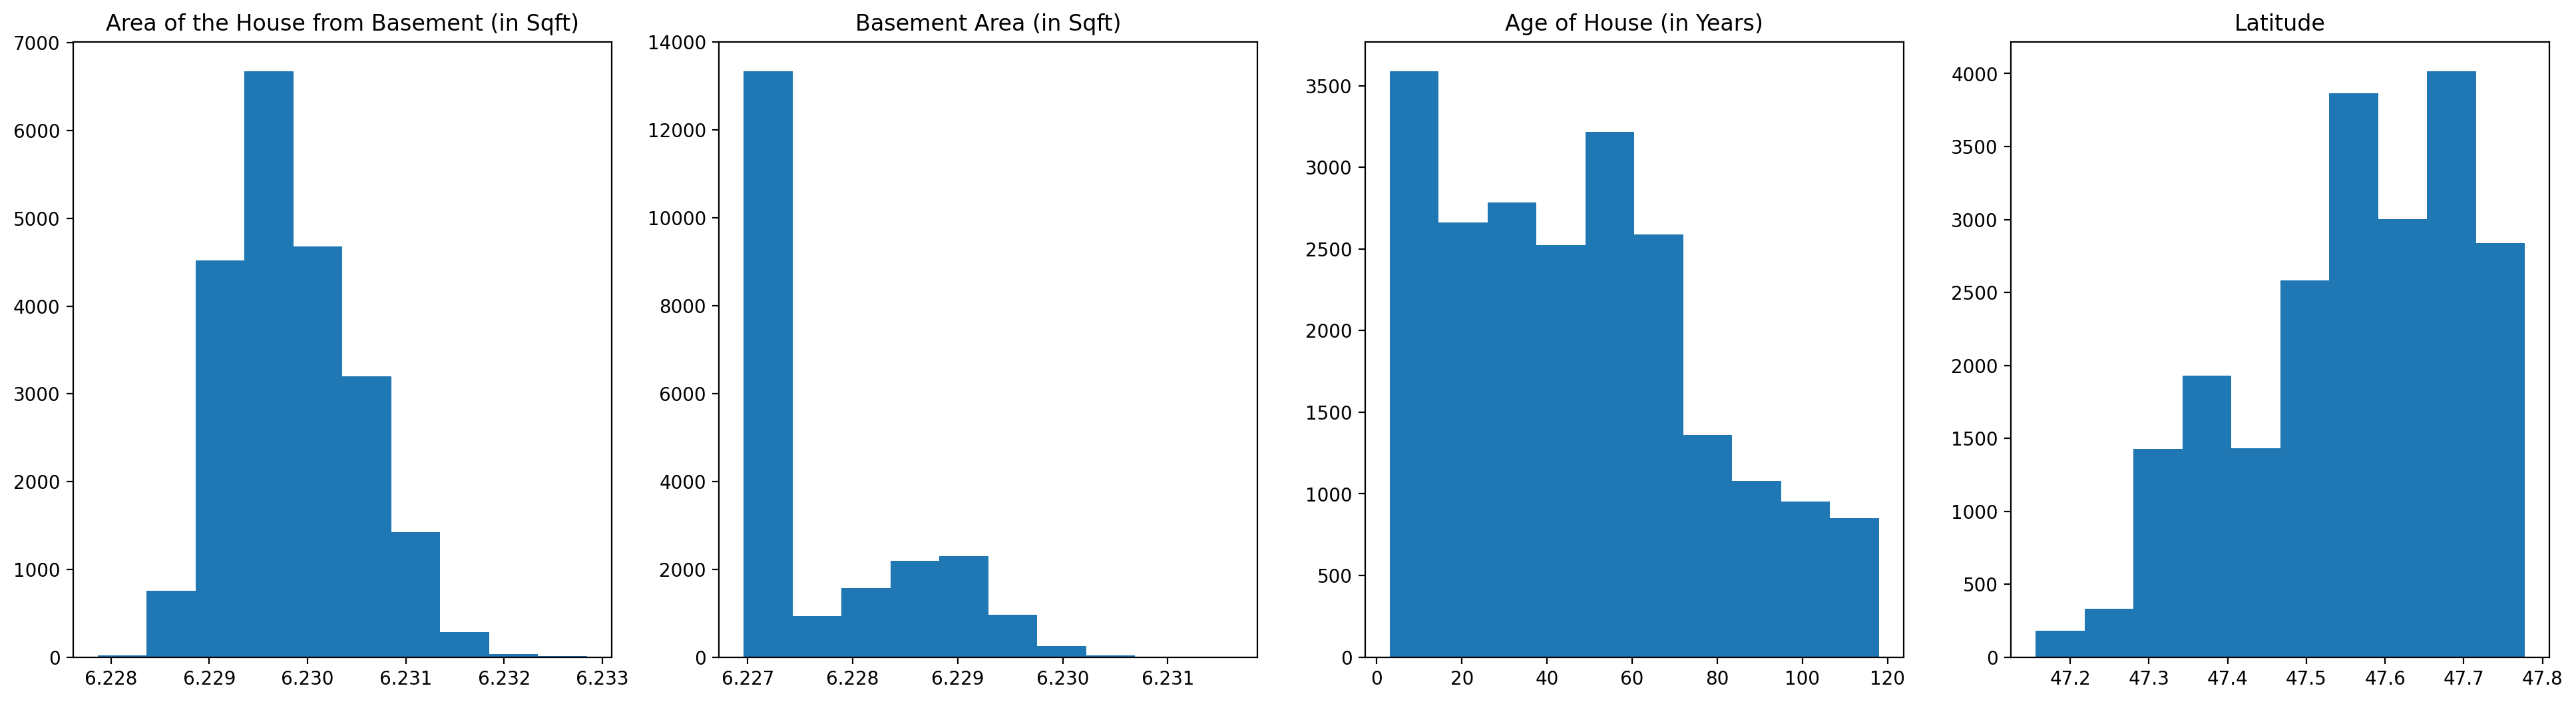

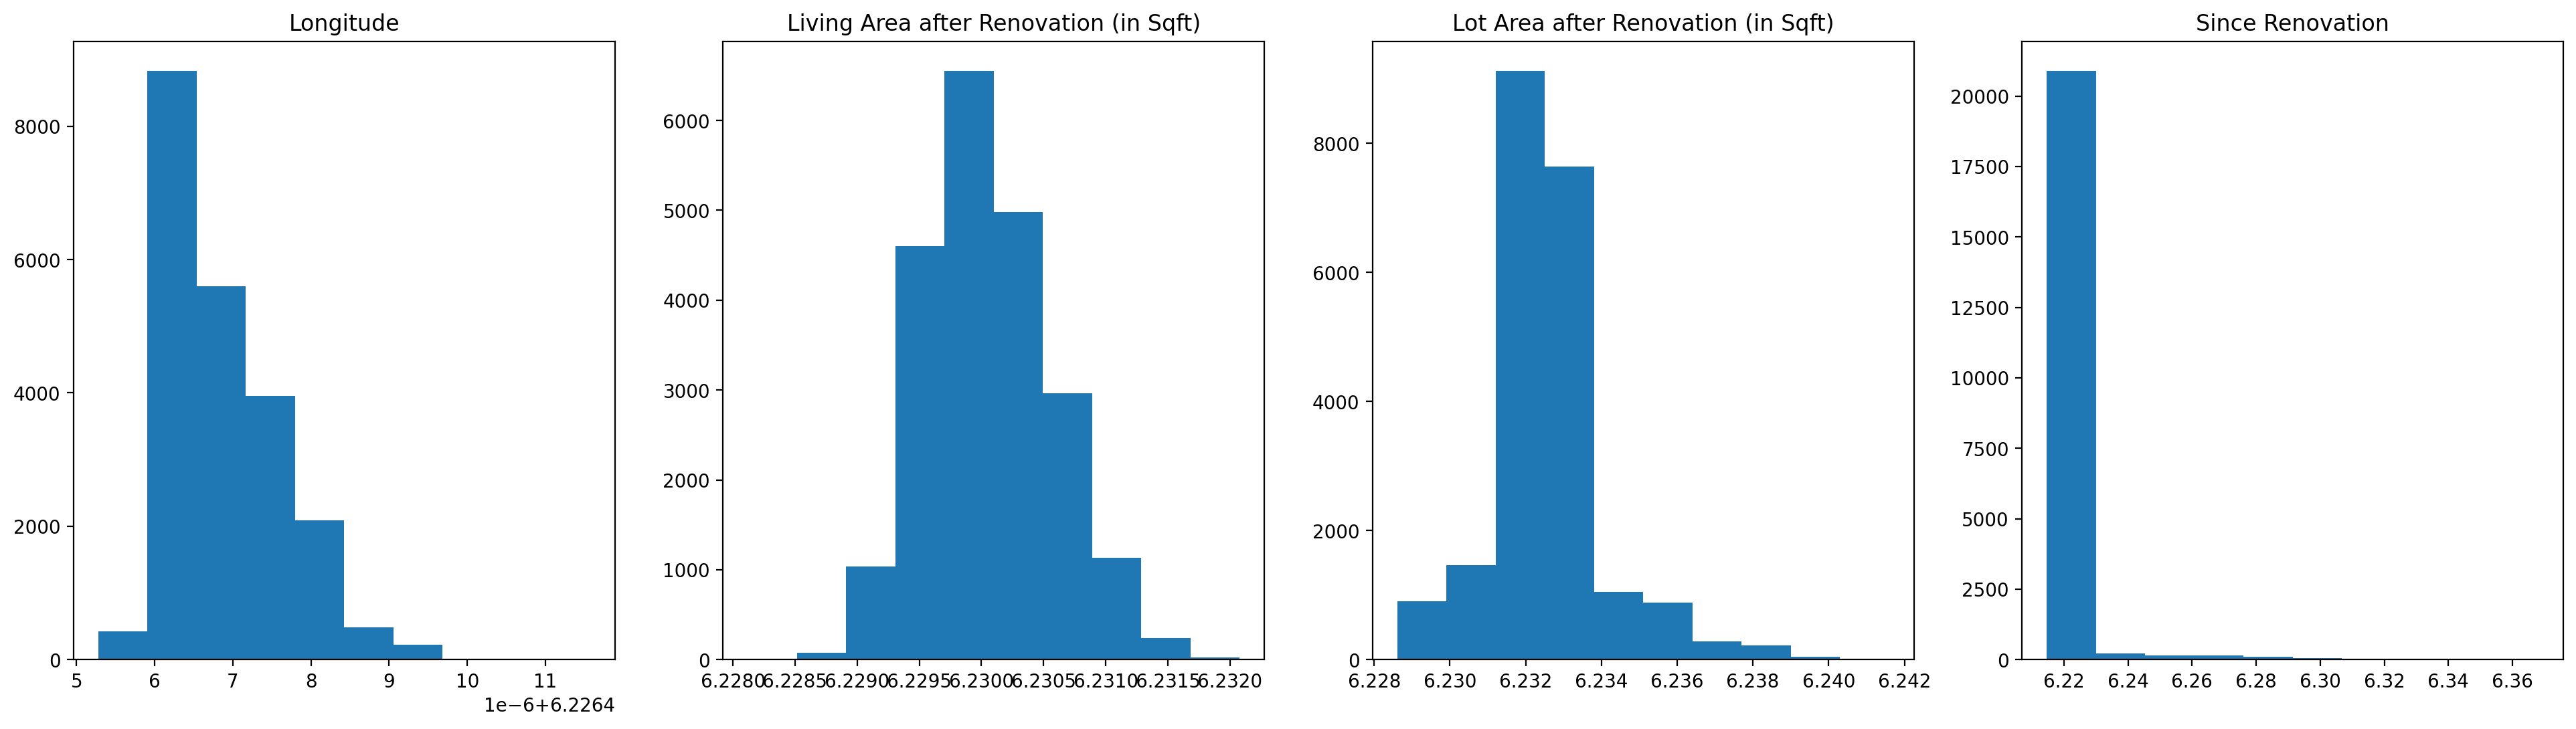

In [154]:
distribution(X, n1)
distribution(X,n2)
distribution(X,n3)

In [156]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Since Renovation
0,6.226973,6.226965,1180.0,6.231906,6.226965,No,0,Fair,7,6.229352,6.226961,63,98178.0,47.5112,6.226407,6.229531,6.231906,No,6.214608
1,6.226973,6.226970,2570.0,6.232358,6.226969,No,0,Fair,7,6.230265,6.228121,67,98125.0,47.7210,6.226406,6.229874,6.232457,Yes,6.265301
2,6.226969,6.226965,770.0,6.232957,6.226965,No,0,Fair,6,6.228800,6.226961,85,98028.0,47.7379,6.226407,6.230633,6.232556,No,6.214608
3,6.226976,6.226973,1960.0,6.231686,6.226965,No,0,Excellent,7,6.229193,6.229007,53,98136.0,47.5208,6.226406,6.229553,6.231686,No,6.214608
4,6.226973,6.226969,1680.0,6.232560,6.226965,No,0,Fair,8,6.229865,6.226961,31,98074.0,47.6168,6.226408,6.229971,6.232424,No,6.214608


In [158]:
X["Waterfront View"] = X["Waterfront View"].map({    'No':0,
   'Yes':1
})


X['Condition of the House'] = X['Condition of the House'].map({'Bad':1,
                                                                     'Okay':2,
                                                                     'Fair':3,
                                                                     'Good':4,
                                                                     'Excellent':5
})

X['Ever_Renovated'] = X['Ever_Renovated'].map({
    'No':0,
    'Yes':1
})

X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Since Renovation
0,6.226973,6.226965,1180.0,6.231906,6.226965,0,0,3,7,6.229352,6.226961,63,98178.0,47.5112,6.226407,6.229531,6.231906,0,6.214608
1,6.226973,6.226970,2570.0,6.232358,6.226969,0,0,3,7,6.230265,6.228121,67,98125.0,47.7210,6.226406,6.229874,6.232457,1,6.265301
2,6.226969,6.226965,770.0,6.232957,6.226965,0,0,3,6,6.228800,6.226961,85,98028.0,47.7379,6.226407,6.230633,6.232556,0,6.214608
3,6.226976,6.226973,1960.0,6.231686,6.226965,0,0,5,7,6.229193,6.229007,53,98136.0,47.5208,6.226406,6.229553,6.231686,0,6.214608
4,6.226973,6.226969,1680.0,6.232560,6.226965,0,0,3,8,6.229865,6.226961,31,98074.0,47.6168,6.226408,6.229971,6.232424,0,6.214608


In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Since Renovation
0,-0.398646,-1.448933,-0.979905,-0.411841,-0.915605,-0.087181,-0.30579,-0.629203,-0.563993,-0.767575,-0.726430,0.544734,1.870094,-0.352576,-0.306108,-1.027661,-0.416287,-0.210155,-0.168911
1,-0.398646,0.176497,0.533718,-0.138806,0.937194,-0.087181,-0.30579,-0.629203,-0.563993,0.642315,0.539015,0.680915,0.879534,1.161645,-0.746519,-0.355795,-0.047631,4.758385,4.827106
2,-1.477795,-1.448933,-1.426369,0.222409,-0.915605,-0.087181,-0.30579,-0.629203,-1.468566,-1.619628,-0.726430,1.293731,-0.933379,1.283619,-0.135645,1.130676,0.019005,-0.210155,-0.168911
3,0.678355,1.149811,-0.130534,-0.544371,-0.915605,-0.087181,-0.30579,2.444136,-0.563993,-1.012806,1.504571,0.204281,1.085122,-0.283288,-1.272266,-0.985942,-0.563303,-0.210155,-0.168911
4,-0.398646,-0.148264,-0.435436,-0.016952,-0.915605,-0.087181,-0.30579,-0.629203,0.340581,0.025444,-0.726430,-0.544715,-0.073647,0.409587,1.199268,-0.166751,-0.069794,-0.210155,-0.168911


## Remove Multicollinearity

In [163]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Since Renovation
No of Bedrooms,1.000000,0.516646,0.577470,0.175714,0.175996,-0.006617,0.079649,0.028514,0.349935,0.509519,0.276721,-0.154614,-0.153164,-0.008867,0.129998,0.404819,0.154570,0.018555,-0.006734
No of Bathrooms,0.516646,1.000000,0.754414,0.104886,0.500980,0.063683,0.187657,-0.124874,0.635778,0.696037,0.253984,-0.506206,-0.204098,0.024506,0.223332,0.572399,0.095689,0.050239,0.004644
Flat Area (in Sqft),0.577470,0.754414,1.000000,0.341686,0.354268,0.103841,0.284678,-0.058922,0.705725,0.853616,0.373179,-0.318146,-0.199380,0.052538,0.240124,0.739462,0.318668,0.055111,0.024552
Lot Area (in Sqft),0.175714,0.104886,0.341686,1.000000,-0.218972,0.074354,0.121725,0.066323,0.165722,0.319775,0.056326,-0.005815,-0.279420,-0.146040,0.376130,0.361826,0.917927,0.022805,0.033049
No of Floors,0.175996,0.500980,0.354268,-0.218972,1.000000,0.023721,0.029503,-0.263676,0.461442,0.548423,-0.266623,-0.489232,-0.059289,0.049640,0.125724,0.277803,-0.211192,0.006318,-0.000379
Waterfront View,-0.006617,0.063683,0.103841,0.074354,0.023721,1.000000,0.401856,0.016650,0.070332,0.063276,0.063249,0.026149,0.030286,-0.014275,-0.041934,0.080559,0.083262,0.093291,0.105822
No of Times Visited,0.079649,0.187657,0.284678,0.121725,0.029503,0.401856,1.000000,0.045978,0.223661,0.161089,0.249394,0.053395,0.084830,0.006162,-0.078472,0.268492,0.118821,0.104051,0.094621
Condition of the House,0.028514,-0.124874,-0.058922,0.066323,-0.263676,0.016650,0.045978,1.000000,-0.143747,-0.153567,0.176036,0.361383,0.003076,-0.015008,-0.106546,-0.090174,0.073555,-0.060152,-0.012115
Overall Grade,0.349935,0.635778,0.705725,0.165722,0.461442,0.070332,0.223661,-0.143747,1.000000,0.723787,0.116024,-0.456711,-0.185844,0.111226,0.201765,0.676764,0.167500,0.010010,-0.023473
Area of the House from Basement (in Sqft),0.509519,0.696037,0.853616,0.319775,0.548423,0.063276,0.161089,-0.153567,0.723787,1.000000,-0.111372,-0.448716,-0.285312,-0.015295,0.360199,0.720707,0.301194,0.026074,0.013461


In [165]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

## Calculating VIF

In [168]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                1.736922
No of Bathrooms                               3.424525
Flat Area (in Sqft)                          21.438744
Lot Area (in Sqft)                            6.854159
No of Floors                                  2.390207
Waterfront View                               1.211023
No of Times Visited                           1.415564
Condition of the House                        1.260555
Overall Grade                                 2.905740
Area of the House from Basement (in Sqft)    23.213433
Basement Area (in Sqft)                       6.541685
Age of House (in Years)                       2.458384
Zipcode                                       1.668851
Latitude                                      1.191524
Longitude                                     1.880325
Living Area after Renovation (in Sqft)        2.916939
Lot Area after Renovation (in Sqft)           6.610192
Ever_Renovated                                3.022758
Since Reno

In [170]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [174]:
for i in range(9):
  vif_data = MC_remover(vif_data)

vif_data.head()

No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Since Renovation
0,-0.398646,-1.448933,-0.915605,-0.087181,-0.30579,-0.629203,-0.563993,-0.726430,0.544734,1.870094,-0.352576,-0.306108,-1.027661,-0.416287,-0.210155,-0.168911
1,-0.398646,0.176497,0.937194,-0.087181,-0.30579,-0.629203,-0.563993,0.539015,0.680915,0.879534,1.161645,-0.746519,-0.355795,-0.047631,4.758385,4.827106
2,-1.477795,-1.448933,-0.915605,-0.087181,-0.30579,-0.629203,-1.468566,-0.726430,1.293731,-0.933379,1.283619,-0.135645,1.130676,0.019005,-0.210155,-0.168911
3,0.678355,1.149811,-0.915605,-0.087181,-0.30579,2.444136,-0.563993,1.504571,0.204281,1.085122,-0.283288,-1.272266,-0.985942,-0.563303,-0.210155,-0.168911
4,-0.398646,-0.148264,-0.915605,-0.087181,-0.30579,-0.629203,0.340581,-0.726430,-0.544715,-0.073647,0.409587,1.199268,-0.166751,-0.069794,-0.210155,-0.168911


In [176]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                            1.498201
 No of Bathrooms                           2.950074
 No of Floors                              2.186149
 Waterfront View                           1.209183
 No of Times Visited                       1.410552
 Condition of the House                    1.253804
 Overall Grade                             2.541289
 Basement Area (in Sqft)                   1.639832
 Age of House (in Years)                   2.392458
 Zipcode                                   1.666022
 Latitude                                  1.183418
 Longitude                                 1.857959
 Living Area after Renovation (in Sqft)    2.503689
 Lot Area after Renovation (in Sqft)       1.553973
 Ever_Renovated                            3.017576
 Since Renovation                          2.868472
 dtype: float64,
 16)

## Train/Test set

In [181]:
X = vif_data[:]
Y = data['Sale Price']

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 16), (6483, 16), (15126,), (6483,))

In [187]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [189]:
lr.coef_

array([  1586.16662942,  42606.86281078,  23305.61990782,   9989.74678821,
        30485.28229177,  16059.33610946, 108947.70895216,  11325.75178588,
        65052.28712527, -15609.10167519,  75616.69585276,  -7742.02631577,
        54276.80096347,   2006.22123993,  16443.12928547, -11319.51908304])

In [191]:
predictions = lr.predict(x_test)

In [193]:
lr.score(x_test, y_test)

0.7344348109102565

### 1. Residuals

In [196]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [198]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

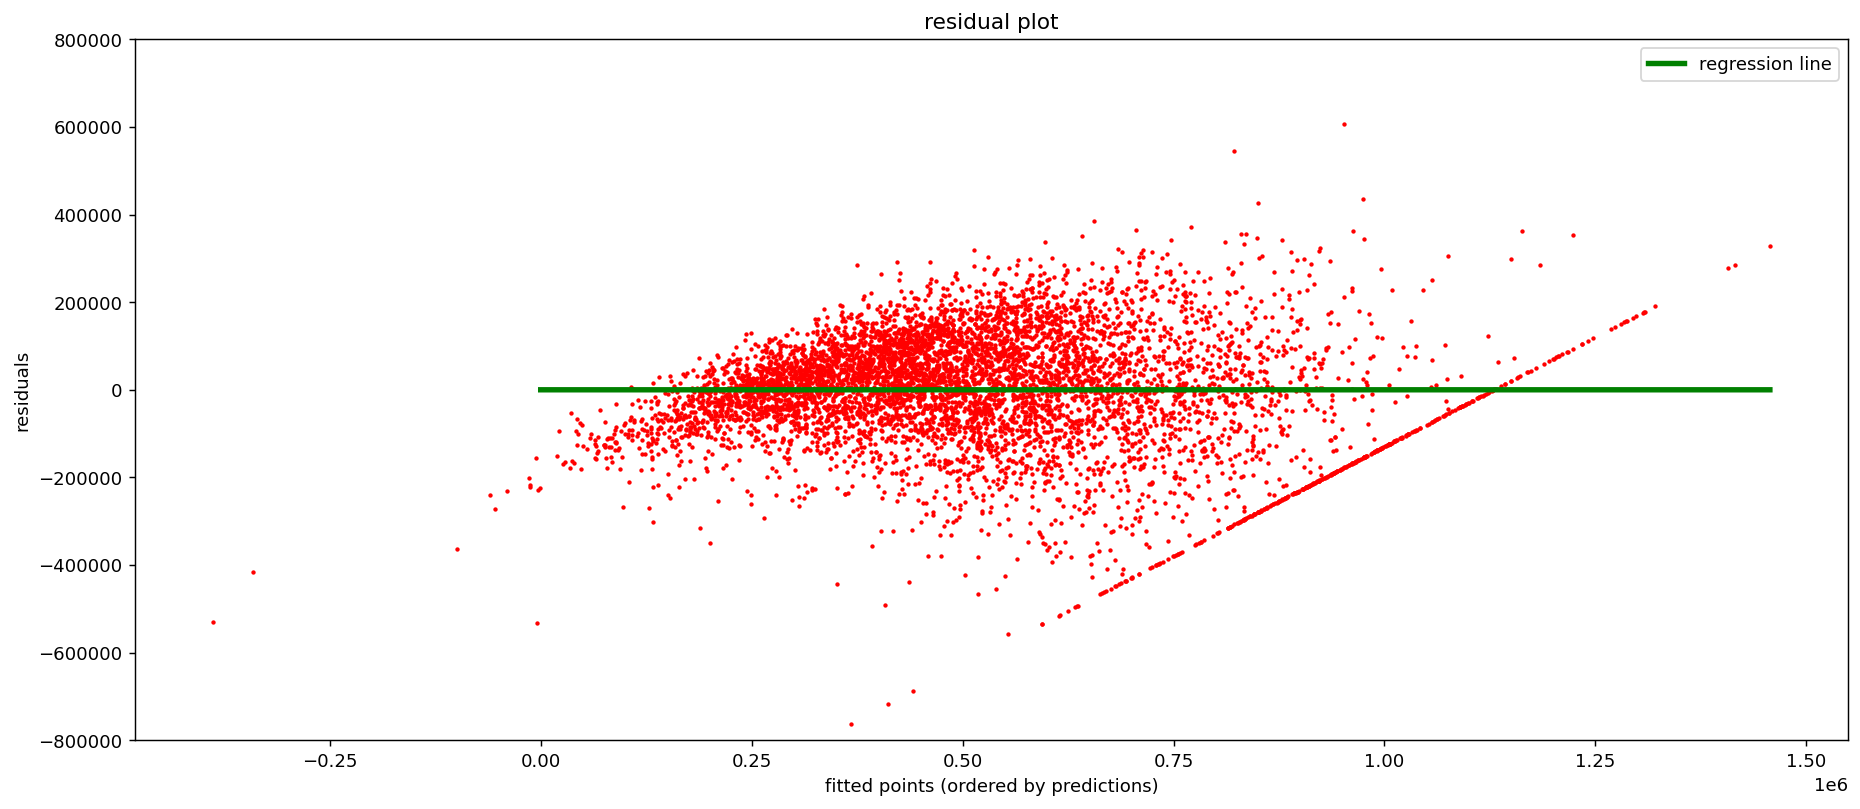

In [202]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

## 2. Distribution of errors

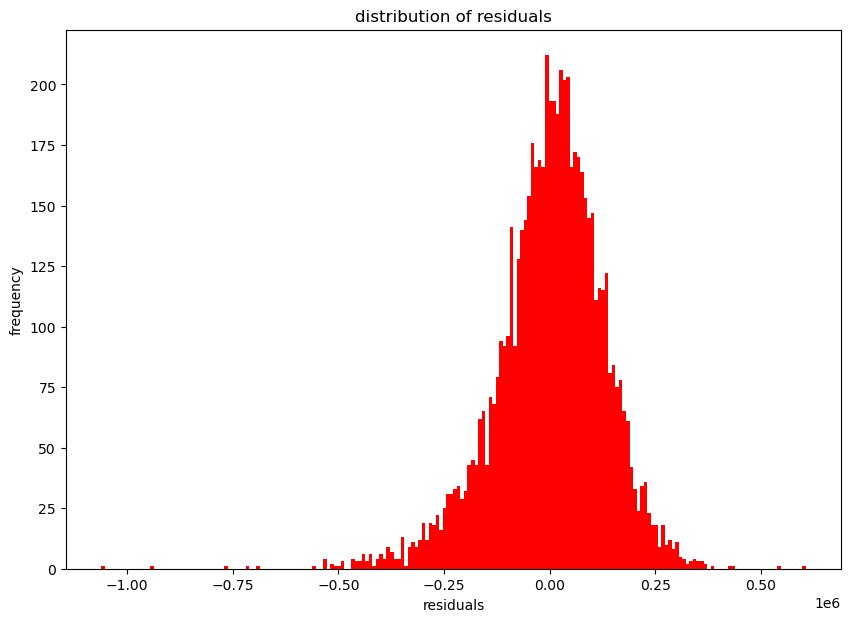

In [209]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

## Model Coefficients

In [212]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


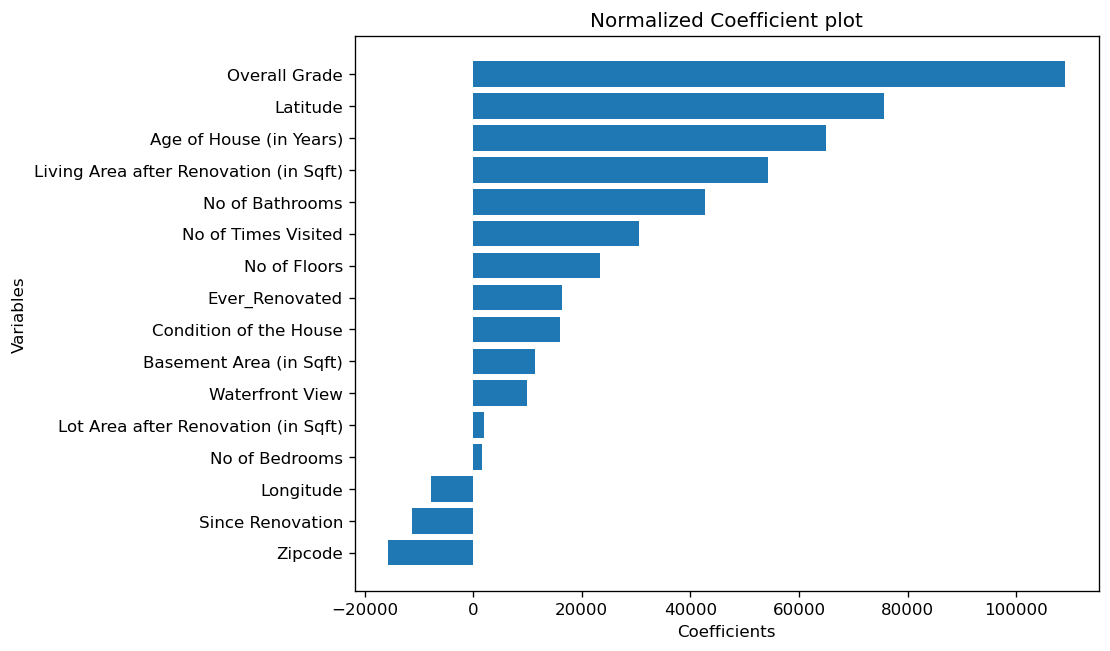

In [214]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()